# Normalized Sense Function

In this notebook, let's go over the steps a robot takes to help localize itself from an initial, uniform distribution to sensing and updating that distribution and finally normalizing that distribution.

1. The robot starts off knowing nothing; the robot is equally likely to be anywhere and so `p` is a uniform distribution.
2. Then the robot senses a grid color: red or green, and updates this distribution `p` according to the values of pHit and pMiss.
3. **We normalize `p` such that its components sum to 1.**

<img src='images/robot_sensing.png' width=50% height=50% />


In [1]:
# importing resources
import matplotlib.pyplot as plt
import numpy as np

A helper function for visualizing a distribution.

In [2]:
def display_map(grid, bar_width=1):
    if(len(grid) > 0):
        x_labels = range(len(grid))
        plt.bar(x_labels, height=grid, width=bar_width, color='b')
        plt.xlabel('Grid Cell')
        plt.ylabel('Probability')
        plt.ylim(0, 1) # range of 0-1 for probability values 
        plt.title('Probability of the robot being at each cell in the grid')
        plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
        plt.show()
    else:
        print('Grid is empty')


### QUIZ: Modify your code so that it normalizes the output for the sense function. 

This means that the entries in `q` should sum to one.

Note that `pHit` refers to the probability that the robot correctly senses the color of the square it is on, so if a robot senses red *and* is on a red square, we'll multiply the current location probability (0.2) with pHit. Same goes for if a robot senses green *and* is on a green square.

[0.1111111111111111, 0.3333333333333332, 0.3333333333333332, 0.1111111111111111, 0.1111111111111111]


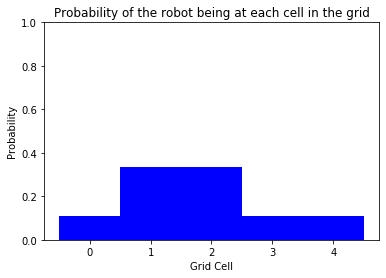

In [3]:
# given initial variables
p=[0.2, 0.2, 0.2, 0.2, 0.2]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
Z = 'red'
pHit = 0.6
pMiss = 0.2

## Complete this function
def sense(p, Z):
    ''' Takes in a current probability distribution, p, and a sensor reading, Z.
        Returns a *normalized* distribution after the sensor measurement has been made, q.
        This should be accurate whether Z is 'red' or 'green'. '''
    
    q=[]
    
    ##TODO: normalize q
    
    # loop through all grid cells
    for i in range(len(p)):
        # check if the sensor reading is equal to the color of the grid cell
        # if so, hit = 1
        # if not, hit = 0
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
        
    # sum up all the components
    s = sum(q)
    # divide all elements of q by the sum
    for i in range(len(p)):
        q[i] = q[i] / s
    return q

q = sense(p,Z)
print(q)
display_map(q)